Dense NN

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7721 - loss: 0.6996 - val_accuracy: 0.9389 - val_loss: 0.1984
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9166 - loss: 0.2707 - val_accuracy: 0.9488 - val_loss: 0.1591
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9333 - loss: 0.2231 - val_accuracy: 0.9581 - val_loss: 0.1322
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9376 - loss: 0.2006 - val_accuracy: 0.9606 - val_loss: 0.1264
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9454 - loss: 0.1769 - val_accuracy: 0.9654 - val_loss: 0.1155
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9499 - loss: 0.1588 - val_accuracy: 0.9643 - val_loss: 0.1134
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9540 - loss: 0.1481 - val_accuracy: 0.9666 - val_loss: 0.1056
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9548 - loss: 0.14

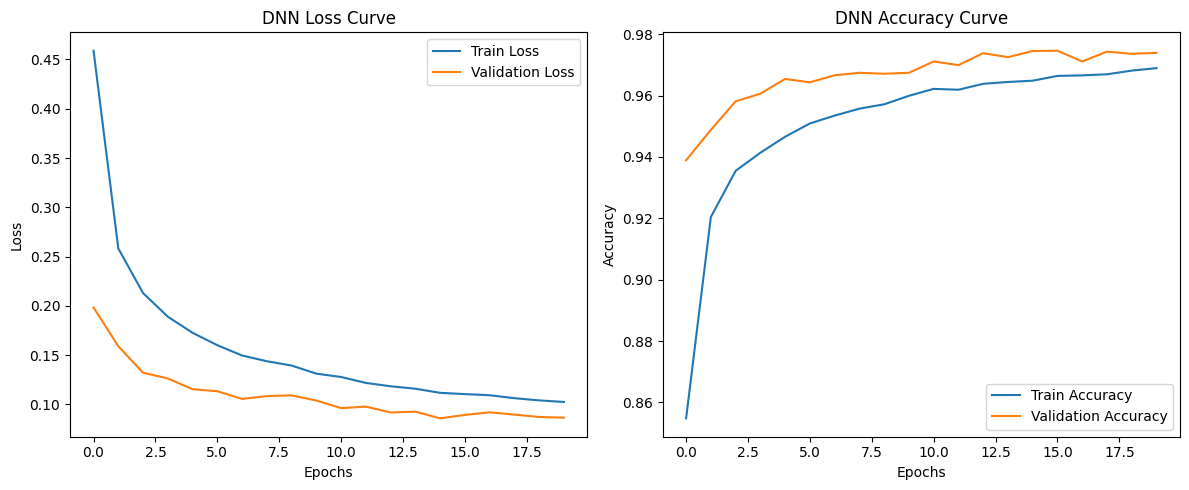

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. 加載 MNIST 數據集
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 正規化數據到 [0,1] 範圍，並增加通道維度
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# One-hot 編碼
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. 使用 tf.data 進行數據增強
def preprocess_data(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(preprocess_data).batch(32).shuffle(1000)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# 3. 定義 Dense NN 模型
model = Sequential([
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# 4. 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. 訓練模型
history = model.fit(train_dataset, validation_data=test_dataset, epochs=20)

# 6. 評估模型
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

# 7. 可視化
plt.figure(figsize=(12, 5))

# 損失曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 準確率曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

CNN

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8276 - loss: 0.5258 - val_accuracy: 0.9737 - val_loss: 0.0863
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9639 - loss: 0.1179 - val_accuracy: 0.9808 - val_loss: 0.0573
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9730 - loss: 0.0877 - val_accuracy: 0.9817 - val_loss: 0.0533
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9790 - loss: 0.0671 - val_accuracy: 0.9826 - val_loss: 0.0539
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9818 - loss: 0.0583 - val_accuracy: 0.9840 - val_loss: 0.0471
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9829 - loss: 0.0540 - val_accuracy: 0.9854 - val_loss: 0.0436
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9846 - val_loss: 0.0487
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9850 - loss: 0

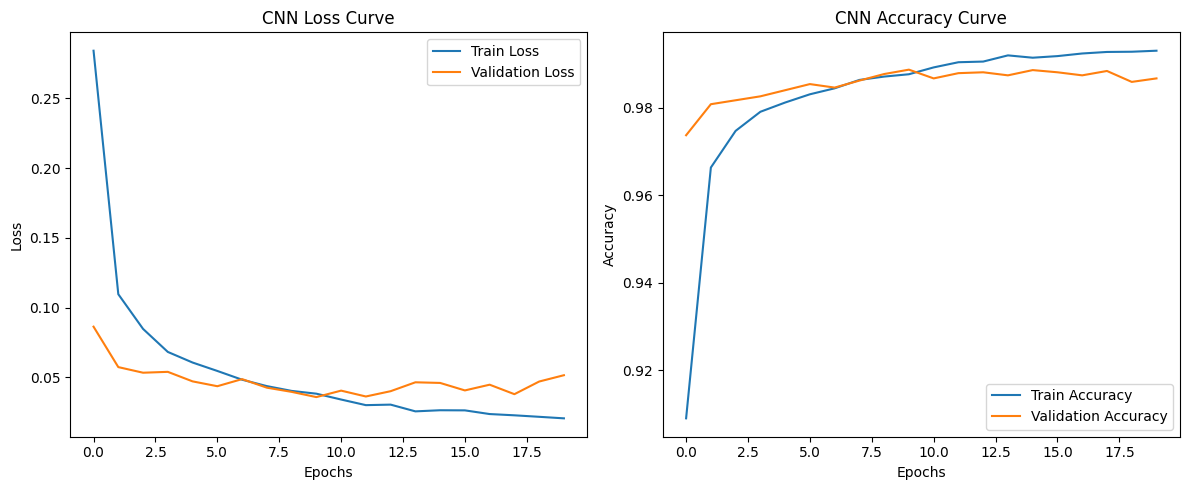

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="keras")

# 1. 加載 MNIST 數據集
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 正規化數據到 [0,1] 範圍，並增加通道維度
X_train = X_train[..., tf.newaxis] / 255.0
X_test = X_test[..., tf.newaxis] / 255.0

# One-hot 編碼
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. 使用 tf.data 進行數據增強
def preprocess_data(image, label):
    image = tf.image.random_flip_left_right(image)  # 隨機水平翻轉
    image = tf.image.random_brightness(image, max_delta=0.1)  # 隨機調整亮度
    return image, label

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(preprocess_data).batch(32).shuffle(1000)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# 3. 定義 CNN 模型
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # 第一層需要明確輸入形狀
    MaxPooling2D(pool_size=(2, 2)),  # 最大池化層
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # 第二層卷積
    MaxPooling2D(pool_size=(2, 2)),  # 最大池化層
    Flatten(),  # 展平層
    Dense(128, activation='relu'),  # 全連接層
    Dropout(0.3),  # Dropout 防止過擬合
    Dense(10, activation='softmax')  # 輸出層
])

# 4. 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. 訓練模型
history = model.fit(train_dataset, validation_data=test_dataset, epochs=20)

# 6. 評估模型
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

# 7. 可視化
plt.figure(figsize=(12, 5))

# 損失曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 準確率曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()